In [36]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [37]:
import pandas as pd

# Buat DataFrame dengan data yang diberikan
data = {
    'Nama': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'Gaji (juta)': [4, 3, 2, 3, 4, 3, 2, 2, 1],
    'Nilai asset': [1, 4, 5, 1, 4, 1, 4, 2, 2],
    'Jumlah kendaraan': [3, 3, 3, 3, 2, 2, 1, 1, 1]
}

df = pd.DataFrame(data)

# Tampilkan DataFrame
df


,Nama,Gaji (juta),Nilai asset,Jumlah kendaraan
0,A,4,1,3
1,B,3,4,3
2,C,2,5,3
3,D,3,1,3
4,E,4,4,2
5,F,3,1,2
6,G,2,4,1
7,H,2,2,1
8,I,1,2,1


In [38]:
X = df.iloc[:,1:4].values
X

array([[4, 1, 3],
       [3, 4, 3],
       [2, 5, 3],
       [3, 1, 3],
       [4, 4, 2],
       [3, 1, 2],
       [2, 4, 1],
       [2, 2, 1],
       [1, 2, 1]])

In [39]:
x1 = np.array(df.iloc[:, 1])
x2 = np.array(df.iloc[:, 2])
x3 = np.array(df.iloc[:, 3])

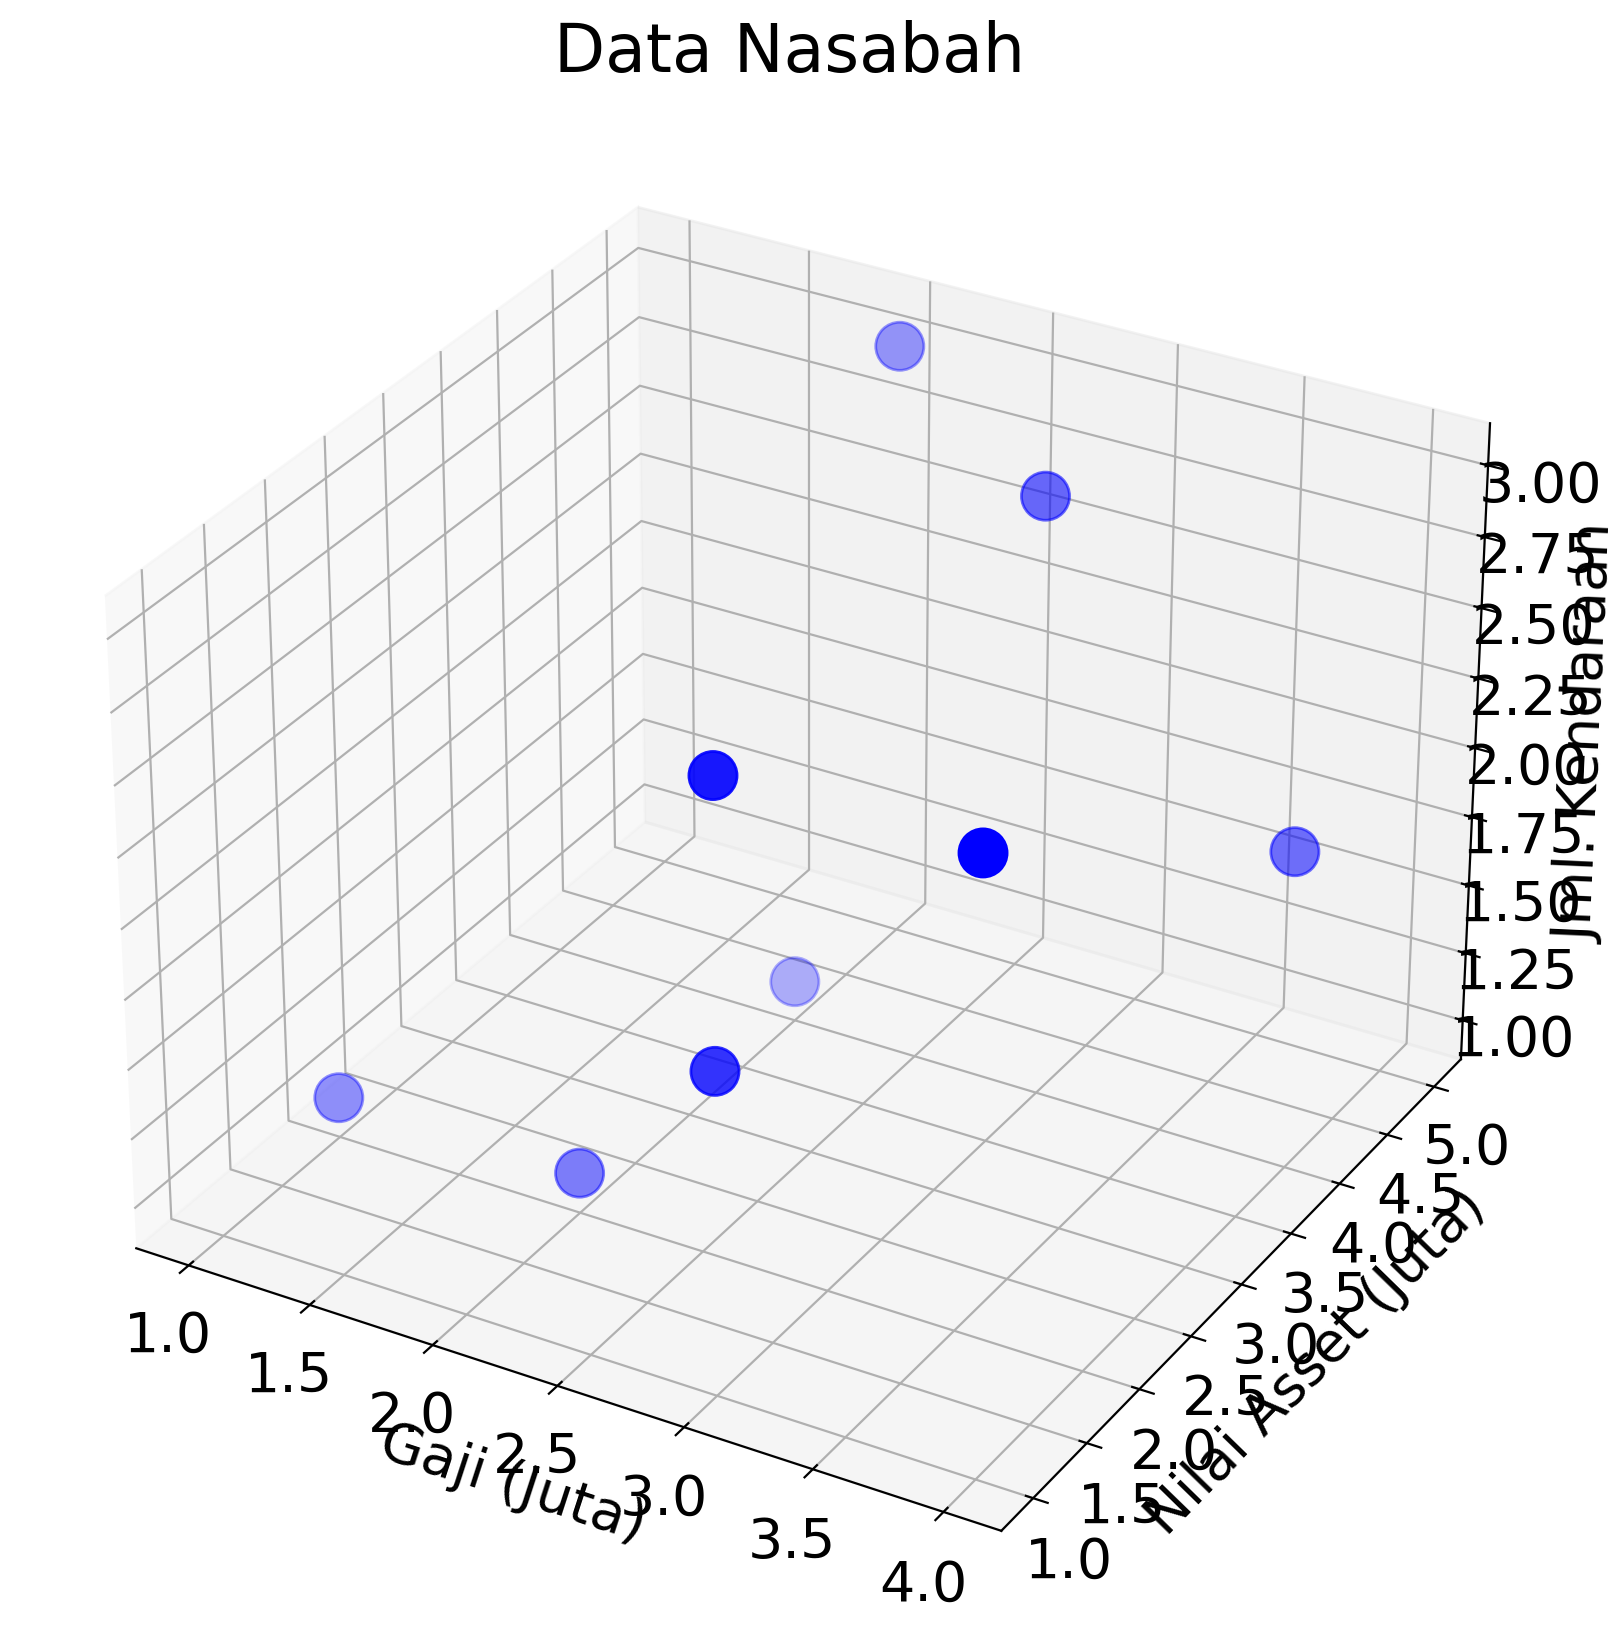

In [40]:
ax = plt.axes(projection ='3d')
ax.set_xlabel('Gaji (Juta)')
ax.set_ylabel('Nilai Asset (Juta)')
ax.set_zlabel('Jml. Kendaraan')
ax.scatter(x1, x2, x3, s=300, c = 'blue')
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["figure.dpi"] = 50
# 4. Menampilkan grafik
plt.title('Data Nasabah')
plt.show()

In [41]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])

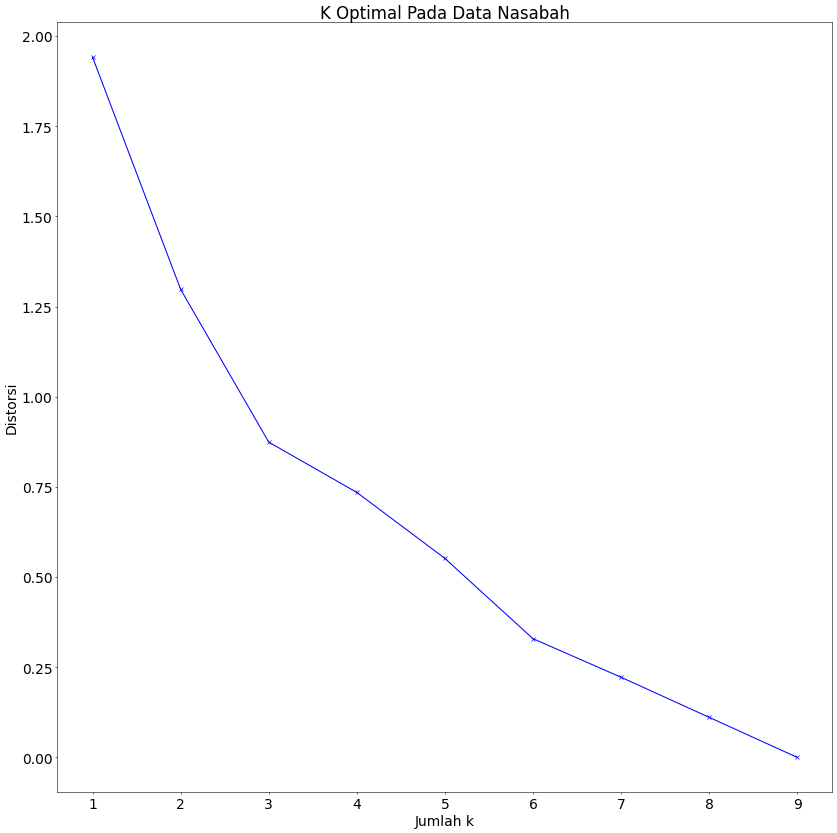

In [42]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Distorsi')
plt.title('K Optimal Pada Data Nasabah')
#mendefinisikan ukuran grafik dan font
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.size"] = "20"
plt.show()

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Data dari tabel yang diberikan
data = {
    'Kota': [
        'Jakarta', 'Surabaya', 'Bandung', 'Medan', 'Makassar', 
        'Semarang', 'Yogyakarta', 'Palembang', 'Denpasar', 
        'Balikpapan', 'Banjarmasin', 'Pontianak', 'Batam', 
        'Malang', 'Samarinda', 'Pekanbaru', 'Manado', 
        'Padang', 'Bandar Lampung', 'Mataram'
    ],
    'Jumlah Penduduk (juta jiwa)': [
        10.5, 2.9, 2.5, 2.4, 1.5, 
        1.7, 0.4, 1.6, 0.9, 0.7, 
        0.6, 0.6, 1.1, 0.8, 0.8, 
        1.2, 0.5, 0.9, 1.0, 0.5
    ],
    'Luas Wilayah (km²)': [
        662, 350, 167, 265, 199, 
        373, 32, 400, 127, 503, 
        98, 107, 715, 145, 718, 
        632, 157, 695, 197, 61
    ],
    'Tingkat Pengangguran (%)': [
        7.5, 6.0, 7.0, 5.8, 5.0, 
        5.3, 4.8, 6.5, 4.0, 5.2, 
        4.9, 5.5, 4.3, 6.0, 5.0, 
        6.2, 5.7, 5.9, 5.4, 5.1
    ],
    'PDRB per Kapita (juta rupiah)': [
        200, 150, 120, 110, 100, 
        130, 90, 105, 140, 160, 
        95, 85, 150, 110, 120, 
        135, 90, 115, 100, 85
    ]
}

# Buat DataFrame
df = pd.DataFrame(data)

In [44]:
X = df[['Jumlah Penduduk (juta jiwa)', 'Luas Wilayah (km²)', 'Tingkat Pengangguran (%)', 'PDRB per Kapita (juta rupiah)']]

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Kluster'] = kmeans.fit_predict(X_scaled)

In [47]:
print("Hasil Klustering:")
print(df[['Kota', 'Kluster']])

Hasil Klustering:
              Kota  Kluster
0          Jakarta        2
1         Surabaya        0
2          Bandung        0
3            Medan        0
4         Makassar        1
5         Semarang        0
6       Yogyakarta        1
7        Palembang        0
8         Denpasar        1
9       Balikpapan        0
10     Banjarmasin        1
11       Pontianak        1
12           Batam        0
13          Malang        1
14       Samarinda        0
15       Pekanbaru        0
16          Manado        1
17          Padang        0
18  Bandar Lampung        1
19         Mataram        1
